In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings;warnings.filterwarnings("ignore")

In [2]:
scClass_path = !cd ../scClass_modelA;pwd
scClass_path = str(scClass_path.n)
import sys; sys.path.append(scClass_path)
import scClass
from scClass.main import Model

In [3]:
adata_bm = sc.read_h5ad("../dataset/BoneMarrow.h5ad")
adata_cb = sc.read_h5ad("../dataset/CordBlood.h5ad")
adata_tt = sc.read_h5ad("../dataset/PBMC68k.h5ad")

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
adata_bm.obs_names_make_unique()
adata_cb.obs_names_make_unique()
adata_tt.obs_names_make_unique()
adata_bm.var_names_make_unique()
adata_cb.var_names_make_unique()
adata_tt.var_names_make_unique()

In [5]:
adata_bm = adata_bm[adata_bm.obs['modelA id']!=-1,:]
adata_cb = adata_cb[adata_cb.obs['modelA id']!=-1,:]
adata_tt = adata_tt[adata_tt.obs['modelA id']!=-1,:]

In [6]:
gene = adata_tt.var_names.values
adata_tt = scClass.transmodel(adata_tt,gene=gene,gene_ref='Gene')
adata_tt.var = adata_bm.var

get gene seq...
0% 15% 30% 45% 61% 76% 91% 
Of 32643 genes in the input file, 19539 were found in the training set of 45468 genes.
mapping to model...
0% 84% 

In [7]:
adata_bm = scClass.normalize_simple(adata_bm)
adata_cb = scClass.normalize_simple(adata_cb)
adata_tt = scClass.normalize_simple(adata_tt)

In [8]:
adata = sc.AnnData.concatenate(adata_bm,adata_cb,adata_tt)

In [9]:
adata.X

<577708x45468 sparse matrix of type '<class 'numpy.float32'>'
	with 562353235 stored elements in Compressed Sparse Row format>

## Cluster

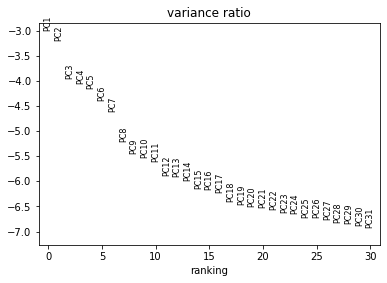

In [10]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [11]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

2022-03-11 16:44:21.041460: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-11 16:44:21.041627: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Using TensorFlow backend.


... storing 'cell_names' as categorical
... storing 'input_id' as categorical
... storing 'label' as categorical
... storing 'u_CellID' as categorical
... storing 'transfer cell type' as categorical
... storing 'origin cell type' as categorical


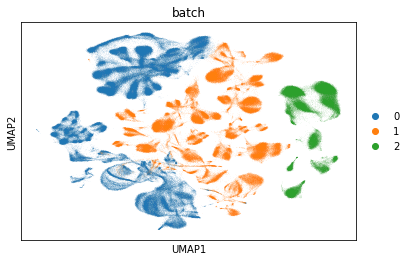

In [12]:
sc.pl.umap(adata,color='batch')

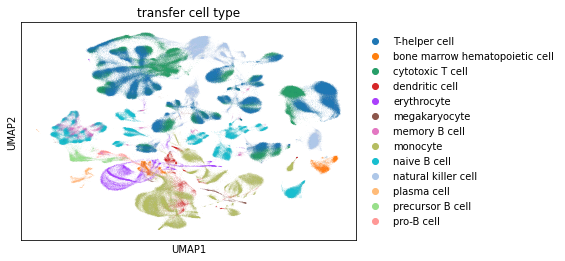

In [13]:
sc.pl.umap(adata,color='transfer cell type')

## Harmony

In [14]:
sc.external.pp.harmony_integrate(adata, 'batch')

2022-03-11 17:08:30,729 - harmonypy - INFO - Iteration 1 of 10
2022-03-11 17:16:00,921 - harmonypy - INFO - Iteration 2 of 10
2022-03-11 17:23:32,782 - harmonypy - INFO - Iteration 3 of 10
2022-03-11 17:31:06,467 - harmonypy - INFO - Converged after 3 iterations


In [15]:
adata.write_h5ad('harmony_PBMC68k.h5ad')

In [16]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony')
sc.tl.umap(adata)

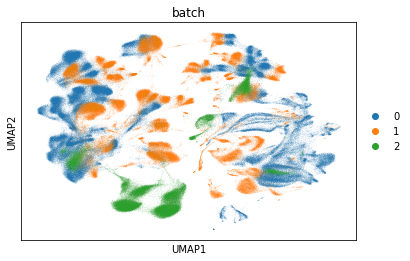

In [17]:
sc.pl.umap(adata,color='batch')

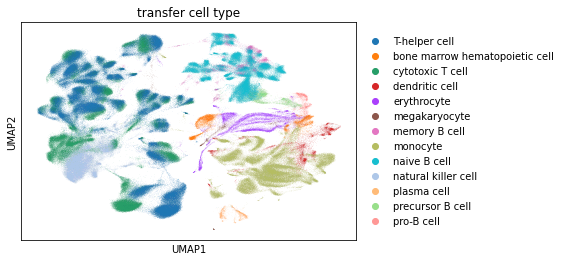

In [18]:
sc.pl.umap(adata,color='transfer cell type')

## Training

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import torch
import warnings;warnings.filterwarnings("ignore")

In [2]:
scClass_path = !cd ../scClass_modelA;pwd
scClass_path = str(scClass_path.n)
import sys; sys.path.append(scClass_path)
import scClass
from scClass.main import Model

In [3]:
adata = sc.read_h5ad("harmony_PBMC68k.h5ad")
adata.X

<577708x45468 sparse matrix of type '<class 'numpy.float32'>'
	with 562353235 stored elements in Compressed Sparse Row format>

In [4]:
scClass.main.EPOCH = 30

In [5]:
dataset = scClass.npz_dataloader(adata)

In [6]:
model = scClass.Model()

In [7]:
scClass.training(dataset,model)

1 11 21 31 41 51 61 epoch 0 	| loss:1.79693902 | training accuracy:0.40939826| loss:1.79460073 | validation accuracy:0.41067119
1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 epoch 5 	| loss:0.45085353 | training accuracy:0.88052556| loss:0.45014933 | validation accuracy:0.88015942
1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 epoch 10 	| loss:0.34022340 | training accuracy:0.89429234| loss:0.34023917 | validation accuracy:0.89459131
1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 epoch 15 	| loss:0.30519184 | training accuracy:0.89967526| loss:0.30557674 | validation accuracy:0.90038338
1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 1 11 21 31 41 51 61 epoch 20 	| loss:0.28829169 | training accuracy:0.90228019| loss:0.28888160 | validation accuracy:0.90304497
1 11 21 31 41 51 61 1 11 21 31 41 51 

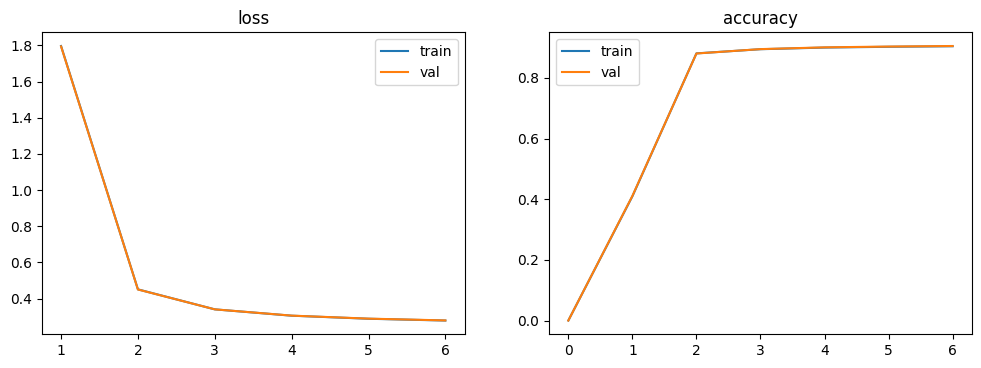

In [8]:
scClass.plot_learning_curve()  

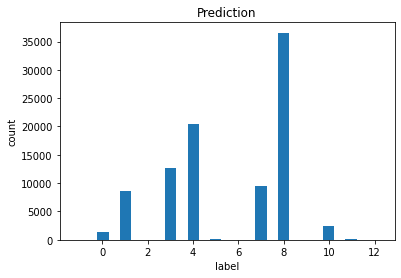

In [9]:
scClass.main.threshold = [np.NAN]*13
y_pred = scClass.predict_batch(dataset.test_x,model)

## Verity Testing Data

,label
-1,unknown
0,T-helper cell
1,cytotoxic T cell
2,memory B cell
3,naive B cell
4,plasma cell
5,precursor B cell
6,pro-B cell
7,natural killer cell
8,erythrocyte

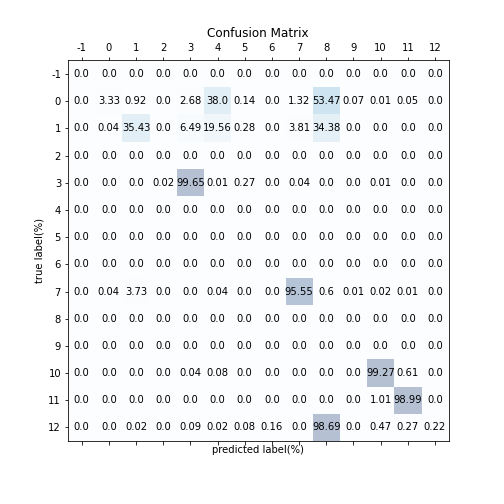

In [10]:
fig = scClass.confusion_matrix(y_pred=y_pred,y_true=dataset.test_y)
scClass.figure_html(fig)

In [11]:
y_pred[y_pred==2] = 3 
y_true = np.array(dataset.test_y)
scClass.plot_performance(y_pred=y_pred,y_true=y_true)

,Performance,Value
0,accuary,0.325562
1,precision,0.617812
2,recall,0.884208
3,f1-score,0.591124


## Verity Training Data

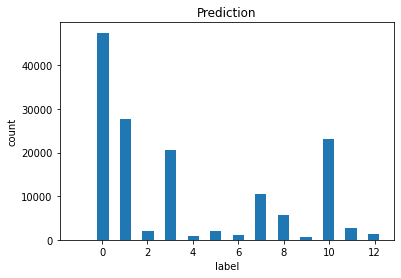

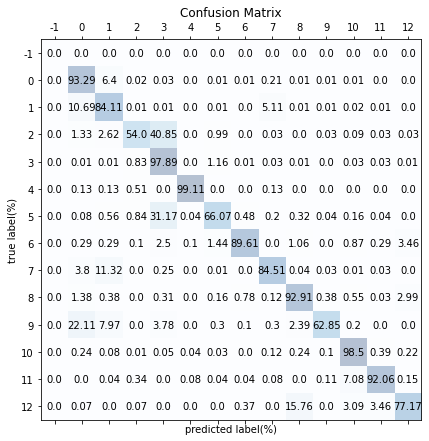

In [12]:
y_pred = scClass.predict_batch(dataset.val_x,model)
scClass.confusion_matrix(y_pred=y_pred,y_true=dataset.val_y)

In [13]:
scClass.plot_performance(y_pred=y_pred,y_true=np.array(dataset.val_y))

,Performance,Value
0,accuary,0.905913
1,precision,0.840045
2,recall,0.903036
3,f1-score,0.864968
